In [20]:
%load_ext autoreload
%autoreload 2

import camp
import numpy as np

In [23]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

def json_to_hist(json_file):
    """
    Takes JSON file constructed from pt_uproot.py or bootstrap.py
    and transforms it into a dataframe for plotting histograms.
    """
    # Load JSON
    with open(json_file) as f:
        res = json.load(f)

    # Convert JSON into DataFrame
    mc_df = pd.DataFrame(res)

    # Expand the "estimates" column into separate columns
    if "estimates" in mc_df.columns:
        mc_df = mc_df["estimates"].apply(pd.Series)

    # Number of columns to plot
    n_cols = len(mc_df.columns)

    # Choose subplot grid automatically (close to square layout)
    n_rows = int(np.ceil(n_cols / 2))
    n_cols_subplot = 2

    fig, axes = plt.subplots(n_rows, n_cols_subplot, figsize=(12, 4 * n_rows))
    axes = np.array(axes).reshape(-1)  # flatten regardless of rows/cols

    # Plot each column
    for i, col in enumerate(mc_df.columns):
        axes[i].hist(mc_df[col], bins=50, color="skyblue", edgecolor="black")
        axes[i].set_title(f"Histogram of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    return fig, axes


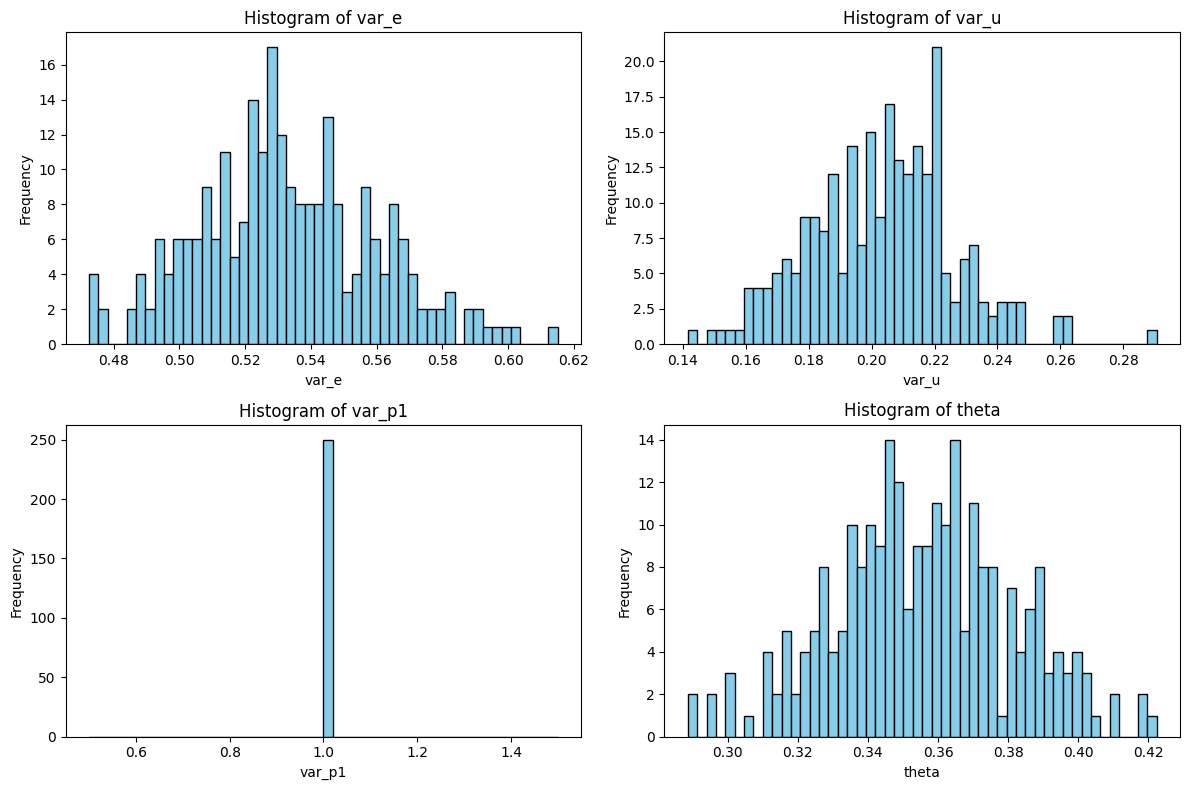

In [ ]:
## Monte Carlo of Earnings Process

# load the yaml file
with open("../uroot.yml", "r") as f:
    data = yaml.safe_load(f)

params = pd.Series(data)

fig, axes = json_to_hist('../output/res.json')

# for i, col in enumerate(mc_df.columns):
#     axes[i].axvline(x = params[col], color = 'red', linestyle = '--')

plt.show()

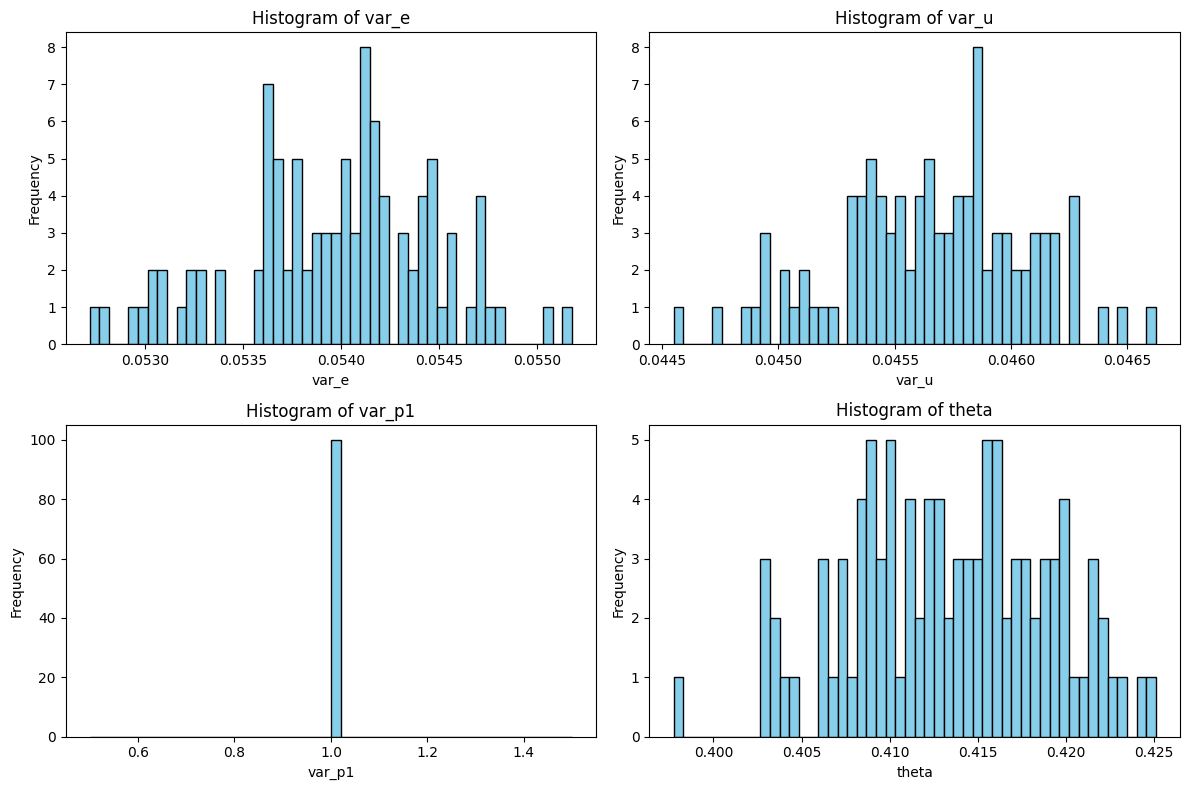

In [25]:
## Bootstrapping distribution 

fig, axes = json_to_hist('../output/bootstrap/bs.json')

# for i, col in enumerate(mc_df.columns):
#     axes[i].axvline(x = params[col], color = 'red', linestyle = '--')

plt.show()